# Background

This notebook demonstrates the effect of incorrect stochastic chain ladder residuals model on the percentiles of actual outcomes.
The percentiles are always calculated using a model which assumes that residuals increments are independent from each other, while actual outcomes are generated from a model in which increments are not necessarily independent.

# Results

The results are presented for three cases:
- Good/bad outcomes become worse/better on average, respectively (factor=0.5).
- Outcomes stay the same on average (factor=1.0).
- Good/bad outcomes become better/worse on average, respectively (factor=1.5).

Both for the first and last case the histograms below show that extreme events happen with higher probability than that predicted by the model.

# Conclusions

The stochastic chain ladder with dependent residuals increments is not straightforward to implement but may offer an alternative explanation to the percentiles histograms shown in [Back-Testing the ODP Bootstrap of the Paid Chain-Ladder Model with
Actual Historical Claims Data](https://www.casact.org/sites/default/files/2021-07/Back-Testing-ODP-Leong-Wang-Chen.pdf). The authors believe that this is caused by unaccounted for systemic risk but we believe that there is significant contribution of using only a model with independent residuals increments.

In [1]:
from scipy.stats import norm
from matplotlib.pyplot import hist, xlabel, ylabel, title, figure

def plot_ultimate_percentiles(factor, N=10000):
    # Sample the first residual
    first_age_residual = norm().rvs(N)
    # Derive the mean of the ultimate residual from the first residual
    mean_ultimate_residual = factor * first_age_residual
    # Generate the development uncertainty from the first residual to the ultimate residual
    first_age_to_ultimate_uncertainty = norm().rvs(N)
    # Calculate the ultimate residual
    ultimate_residual = mean_ultimate_residual + first_age_to_ultimate_uncertainty
    # Calculate the percentile of the ultimate residual based on a model with a factor of one
    ultimate_percentile = norm().cdf(ultimate_residual - first_age_residual)
    hist(ultimate_percentile)
    xlabel('Percentile')
    ylabel('Count')
    title(f'Percentile Histogram for Factor={factor}')


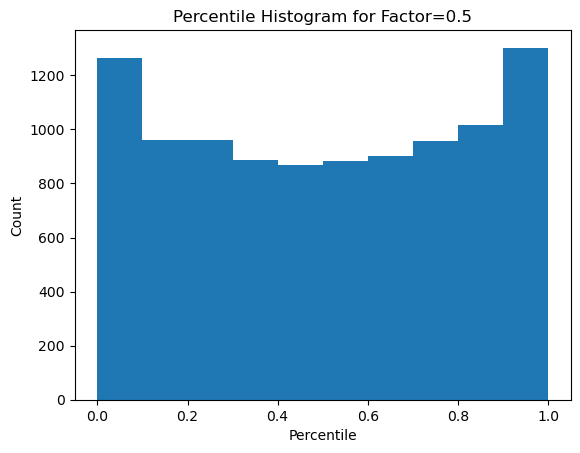

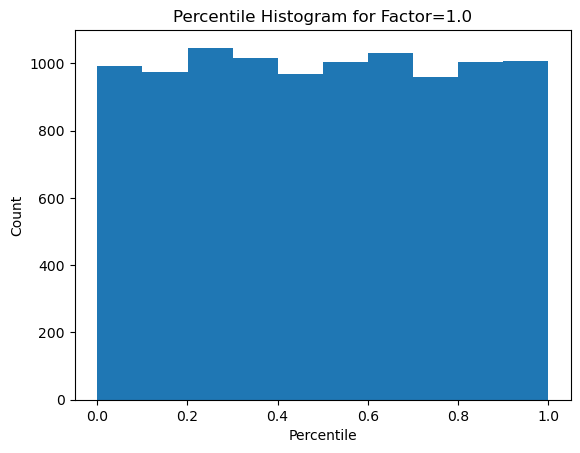

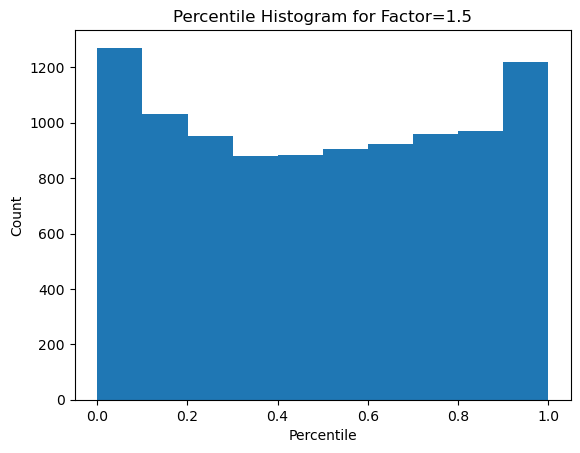

In [2]:
for factor in [0.5, 1.0, 1.5]:
    figure()
    plot_ultimate_percentiles(factor=factor)